# Zestaw 10. Równania różniczkowe zwyczajne

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import animation
import scipy.integrate
from math import tan, sin, pi, cos

## 1. Metoda Eulera i Rungego-Kutty

Zaimplementuj dwie metody rozwiazywania równań różniczkowych zwyczajnych:
- Eulera

In [2]:
def euler(f, u0, t0, x, steps=100):
    h = (x-t0)/steps
    u = u0
    
    t = t0
    
    for _ in range(steps):
        u += h*f(t, u)
        t += h
    
    return u

- Rungego-Kutty rzędu 4

In [3]:
def runge_kutta(f, u0, t0, x, steps=100):
    h = (x-t0)/steps
    u = u0
    
    t = t0
    for i in range(steps):
        k1 = h*f(t, u)
        k2 = h*f(t+h/2, u+k1/2)
        k3 = h*f(t+h/2, u+k2/2)
        k4 = h*f(t+h, u+k3)
        u += (k1 + 2*k2 + 2*k3 + k4)/6
        t += h
    
    return u

Opisz czym charakteryzują się obie metody.
TODO

#### test

* $u' = x$

In [4]:
f = lambda t, x:t
u = lambda x: x**2/2

x = 1
u0 = 0
t0 = 0

In [5]:
print('euler: ', euler(f, u0, t0, x))
print('runge kutta: ', runge_kutta(f, u0, t0, x))
print('wzór analityczny: ', u(x))
print('scipy: ', scipy.integrate.solve_ivp(f, (t0, x), [u0])['y'][0, -1])

euler:  0.4950000000000004
runge kutta:  0.5000000000000002
wzór analityczny:  0.5
scipy:  0.5000000000000001


* $u' = 2 + (u-x-1)^2 $

In [6]:
f = lambda t, x: 2 + (x-t-1)**2
u = lambda t: 1 + t + tan(t-1)

t0 = 1
u0 = 2
x = 1.5625

100 steps

In [7]:
print('euler: ', euler(f, u0, t0, x))
print('runge kutta: ', runge_kutta(f, u0, t0, x))
print('wzór analityczny: ', u(x))
print('scipy: ', scipy.integrate.solve_ivp(f, (t0, x), [u0])['y'][0, -1])

euler:  3.1916333906413565
runge kutta:  3.1929376738362407
wzór analityczny:  3.1929376738358846
scipy:  3.1929385148183353


5 steps

In [8]:
print('euler: ', euler(f, u0, t0, x, 5))
print('runge kutta: ', runge_kutta(f, u0, t0, x, 5))
print('wzór analityczny: ', u(x))
print('scipy: ', scipy.integrate.solve_ivp(f, (t0, x), [u0], min_step=abs(x-t0)/5)['y'][0, -1])

euler:  3.170468096693291
runge kutta:  3.1929374655231495
wzór analityczny:  3.1929376738358846
scipy:  3.1929385148183353


/home/omen/.local/lib/python3.8/site-packages/scipy/integrate/_ivp/common.py:39: UserWarning: The following arguments have no effect for a chosen solver: `min_step`.
  warn("The following arguments have no effect for a chosen solver: {}."


Opisz i zinterpretuj wyniki. TODO

## 2. Wahadło matematyczne

<i> Wykorzystaj implementację z poprzedniego zadania do symulacji wahadła matematycznego wykorzystując równanie: </i>

<center>$\frac{d^2x}{dt^2} + \frac gl \sin{x} = 0$</center>

In [48]:
def pendulum(angle, g, l, n=100):
    y = angle
    v = 0
    
    h = 0.1
    t = 0
    
    for i in range(n):
        y = runge_kutta(lambda t, x: v, y, t, t+h, 10) 
        v = runge_kutta(lambda t, x: -g/l*sin(y), v, t, t+h, 10)
        t += h
        yield(y)

#### animacja

In [49]:
def animate_pendulum(n=1000, angle=pi/4, g=1, l=1):
    fig, ax = plt.subplots(figsize=(8, 4))
    ax.set_xlim(-l, l)
    ax.set_ylim(-10, l)
    scat = ax.scatter([l*sin(angle)], [l-l*cos(angle)], color='slateblue', linewidth=10)
    line, = ax.plot([0, l*sin(angle)], [l, l-l*cos(angle)], color='pink', zorder=0)
    
    ys = list(pendulum(angle, g=g, l=l, n=n))
    
    def update_pendulum(i):
        scat.set_offsets([l*sin(ys[i]), l-l*cos(ys[i])])
        line.set_xdata([0, l*sin(ys[i])])
        line.set_ydata([l, l-l*cos(ys[i])])
        
    return animation.FuncAnimation(fig, update_pendulum, interval=10, frames=n)

<IPython.core.display.Javascript object>


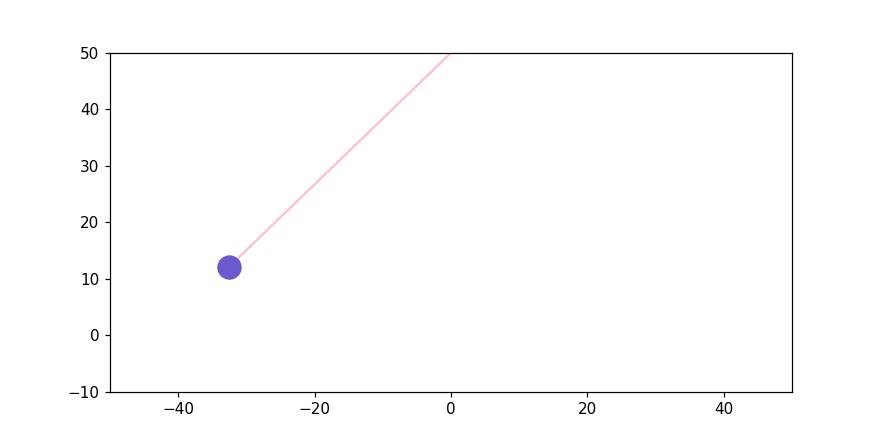

In [50]:
%matplotlib notebook
animated = animate_pendulum(angle=pi/4, g=10, l=50)
plt.draw()
plt.show()

## 3. Wahadło podwójne

In [199]:
def double_pendulum(angle1, angle2, m1, m2, g, l1, l2, n=100):
    theta1 = angle1
    theta2 = angle2
    
    omega1 = 0
    omega2 = 0
    
    h = 0.05
    t = 0
    
    for i in range(n):
        theta1 = runge_kutta(lambda t, x: omega1, theta1, t, t+h) 
        theta2 = runge_kutta(lambda t, x: omega2, theta2, t, t+h) 
        
        omega1_prim = lambda t, x: (-g*(2*m1+m2)*sin(theta1)-m2*g*sin(theta1-2*theta2)-2*sin(theta1-theta2)*m2*(omega2**2*l2+omega1**2*l1*cos(theta1-theta2)))/(l1*(2*m1+m2-m2*cos(2*theta1-2*theta2)))
        omega2_prim = lambda t, x: (2*sin(theta1-theta2)*(omega1**2*l1*(m1+m2)+g*(m1+m2)*cos(theta1)+omega2**2*l2*m2*cos(theta1-theta2)))/(l2*(2*m1+m2-m2*cos(2*theta1-2*theta2)))
    
        omega1 = runge_kutta(omega1_prim, omega1, t, t+h)
        omega2 = runge_kutta(omega2_prim, omega2, t, t+h)
        
        t += h
        yield((theta1, theta2))

In [204]:
def animate_double_pendulum(n=1000, angle1=pi/2, angle2=pi/4, m1=10, m2=10, g=20, l1=10, l2=10):
    fig, ax = plt.subplots(figsize=(8, 4))
    ax.set_xlim(-l1-l2, l1+l2)
    ax.set_ylim(-2, l1+l2)
    
    x1 = lambda angle: l1*sin(angle)
    y1 = lambda angle: l1*cos(angle)
    
    x2 = lambda angle1, angle2: x1(angle1)-l2*sin(angle2)
    y2 = lambda angle1, angle2: y1(angle1)+l2*cos(angle2)
    
    scat1 = ax.scatter([x1(angle1)], [l1+l2-y1(angle1)], color='slateblue', linewidth=10)
    scat2 = ax.scatter([x2(angle1, angle2)], [l1+l2-y2(angle1, angle2)], color='slateblue', linewidth=10)
    line1, = ax.plot([0, x1(angle1)], [l1+l2, l1+l2-y1(angle1)], color='pink', zorder=0)
    line2, = ax.plot([x1(angle1), x2(angle1, angle2)], [l1+l2-y1(angle1), l1+l2-y2(angle1, angle2)], color='pink', zorder=0)
    
    angles = list(double_pendulum(angle1, angle2, m1, m2, g, l1, l2, n))
    
    def update_pendulum(i):
        scat1.set_offsets([x1(angles[i][0]), l1+l2-y1(angles[i][0])])
        scat2.set_offsets([x2(angles[i][0], angles[i][1]), l1+l2-y2(angles[i][0], angles[i][1])])
        line1.set_xdata([0, x1(angles[i][0])])
        line1.set_ydata([l1+l2, l1+l2-y1(angles[i][0])])
        line2.set_xdata([x1(angles[i][0]), x2(angles[i][0], angles[i][1])])
        line2.set_ydata([l1+l2-y1(angles[i][0]), l1+l2-y2(angles[i][0], angles[i][1])])
        
    return animation.FuncAnimation(fig, update_pendulum, interval=10, frames=n)

<IPython.core.display.Javascript object>


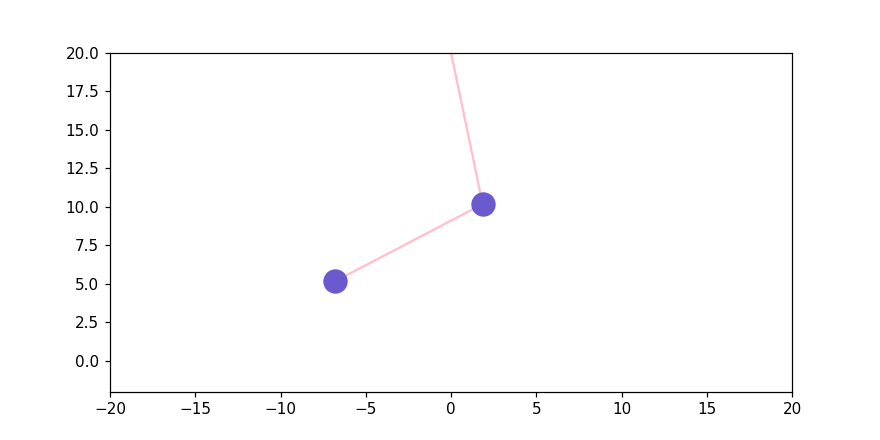

In [205]:
%matplotlib notebook
animated = animate_double_pendulum()
plt.draw()
plt.show()

## Wnioski

- 
- 

M. Hawryluk 23.05.2021